# Final Project Code

We can use this notebook to keep track of all our analysis and conclusions. For now, we should just create dataframes from our processed words. Eventually, we'll import code and stuff from each individual section (i.e. Sentiment Analysis, Heatmaps, etc.)

In [89]:
# Importing Libraries
import numpy as np
import pandas as pd
import collections as c
import matplotlib as plt
import seaborn as sns

### Words -> DataFrames

For each of our texts, we construct a DataFrame using wordstems as indexes and a column to denote the number of occurrences of a wordstem in the text.

In [2]:
# Four Noble Truths
with open("Processed_Texts/fournobletruths_words.txt", encoding='utf8') as f:
    words = f.read().splitlines()
#print(words) #this is now an array of all the wordstems
fnt_string = " ".join(words)   
fnt_count = c.Counter(words)
word_freq = dict(c.Counter(words))
fnt_df = pd.DataFrame(word_freq.values(), word_freq.keys(), ["count"]).sort_values("count", ascending=False)
fnt_df.head()

,count
right,136
mind,132
feel,115
stress,98
monk,92


In [3]:
# Lotus Sutra
with open("Processed_Texts/lotussutra_words.txt", encoding='utf8') as f:
    words = f.read().splitlines()
ls_string = " ".join(words)
ls_count = c.Counter(words)
word_freq = dict(c.Counter(words))
ls_df = pd.DataFrame(word_freq.values(), word_freq.keys(), ["count"]).sort_values("count", ascending=False)
ls_df.head()

,count
buddha,1375
dharma,557
bodhisattva,556
teach,477
great,426


In [4]:
# Tao Te Ching
with open("Processed_Texts/taoteching_words.txt", encoding='utf8') as f:
    words = f.read().splitlines()
ttc_string = " ".join(words)
ttc_count = c.Counter(words)
word_freq = dict(c.Counter(words))
ttc_df = pd.DataFrame(word_freq.values(), word_freq.keys(), ["count"]).sort_values("count", ascending=False)
ttc_df.head()

,count
tao,84
thing,64
one,52
know,48
great,46


In [5]:
# Upanishads
with open("Processed_Texts/upanishads_words.txt", encoding='utf8') as f:
    words = f.read().splitlines()

u_string = " ".join(words)
word_freq = dict(c.Counter(words))
u_df = pd.DataFrame(word_freq.values(), word_freq.keys(), ["count"]).sort_values("count", ascending=False)
u_df.head()

,count
one,110
know,100
self,85
mind,81
brahman,76


In [6]:
# Yogasutras
with open("Processed_Texts/yogasutras_words.txt", encoding='utf8') as f:
    words = f.read().splitlines()

ys_string = " ".join(words)
word_freq = dict(c.Counter(words))
ys_df = pd.DataFrame(word_freq.values(), word_freq.keys(), ["count"]).sort_values("count", ascending=False)
ys_df.head()

,count
spiritu,322
man,245
power,198
life,156
conscious,149


### Sentiment Analysis

### Heatmaps/Text Visualizations

In [7]:
# https://stackoverflow.com/questions/28819272/python-how-to-calculate-the-cosine-similarity-of-two-word-lists
# convert to word-vectors
words  = list(fnt_count.keys() | ls_count.keys())
fnt_vect = [fnt_count.get(word, 0) for word in words]       
ls_vext = [ls_count.get(word, 0) for word in words]        

# find cosine
len_a  = sum(av*av for av in fnt_vect) ** 0.5            
len_b  = sum(bv*bv for bv in ls_vext) ** 0.5             
dot    = sum(av*bv for av,bv in zip(fnt_vect, ls_vext))   
cosine = dot / (len_a * len_b)                          
cosine

0.20894492369253445

In [8]:
# convert to word-vectors
words  = list(ttc_count.keys() | ls_count.keys())
ttc_vect = [ttc_count.get(word, 0) for word in words]       
ls_vext = [ls_count.get(word, 0) for word in words]        

# find cosine
len_a  = sum(av*av for av in ttc_vect) ** 0.5            
len_b  = sum(bv*bv for bv in ls_vext) ** 0.5             
dot    = sum(av*bv for av,bv in zip(ttc_vect, ls_vext))   
cosine = dot / (len_a * len_b)                          
cosine

0.2917583276957685

In [9]:
books = [fnt_string,ttc_string, u_string, ls_string, ys_string]

In [10]:
book_names = ["ys_0", "fnt_1", "ttc_2", "up_3", "ls_4"]
pairs = []
for i, v in enumerate(book_names):
    for j in book_names[i+1:]:
        pairs.append((book_names[i], j))
print(pairs)

[('ys_0', 'fnt_1'), ('ys_0', 'ttc_2'), ('ys_0', 'up_3'), ('ys_0', 'ls_4'), ('fnt_1', 'ttc_2'), ('fnt_1', 'up_3'), ('fnt_1', 'ls_4'), ('ttc_2', 'up_3'), ('ttc_2', 'ls_4'), ('up_3', 'ls_4')]


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1))
# calculate the feature matrix
feature_matrix = vectorizer.fit_transform(books).astype(float)
display(feature_matrix.toarray()[4])

array([0.        , 0.        , 0.        , ..., 0.00183686, 0.        ,
       0.        ])

In [12]:
def compute_cosine_similarity(pair):
    
    # extract the indexes from the pair
    book1, book2 = pair
    
    # split on _ and get index
    book1_index = int(book1.split("_")[1])
    book2_index = int(book2.split("_")[1])
        
    # get the feature matrix of the document
    book1_fm = feature_matrix.toarray()[book1_index]
    
    book2_fm = feature_matrix.toarray()[book2_index]
    
    # compute cosine similarity manually
    manual_cosine_similarity = np.dot(book1_fm, book2_fm)
    
    return manual_cosine_similarity

In [13]:
pairwise_cosine_similarity = [compute_cosine_similarity(pair) for pair in pairs]

# create a dataframe
df = pd.DataFrame({'pair': pairs, 'similarity': pairwise_cosine_similarity})
df
# display(df.tail())

,pair,similarity
0,"(ys_0, fnt_1)",0.191506
1,"(ys_0, ttc_2)",0.279178
2,"(ys_0, up_3)",0.135430
3,"(ys_0, ls_4)",0.243019
4,"(fnt_1, ttc_2)",0.339055
5,"(fnt_1, up_3)",0.159170
6,"(fnt_1, ls_4)",0.275577
7,"(ttc_2, up_3)",0.196266
8,"(ttc_2, ls_4)",0.454150
9,"(up_3, ls_4)",0.151803


In [14]:
# from utils import plot_heatmap

# initialize an empty dataframe grid
df_hm = pd.DataFrame({'ind': range(5), 'cols': range(5), 'vals': pd.Series(np.zeros(5))})

# convert to a matrix
df_hm = df_hm.pivot(index='ind', columns='cols').fillna(0)

# make a copy
df_temp = df.copy()

# convert list of tuples into 2 lists
list1 = []
list2 = []
for item1, item2 in df_temp.pair:
    list1.append(item1)
    list2.append(item2)

# add two columns to df_temp
df_temp['book1'] = list1
df_temp['book2'] = list2

# drop the pair as it not needed
df_temp.drop('pair', axis=1, inplace=True)

# extract index so that you can construct pairs
df_temp['book1'] = df_temp['book1'].apply(lambda x: int(x.split('_')[-1]))
df_temp['book2'] = df_temp['book2'].apply(lambda x: int(x.split('_')[-1]))

# create tuples (0, 1, similarity)
df_temp['pairs'] = list(zip(df_temp.book1, df_temp.book2, round(df_temp.similarity, 2)))

# display(df_temp.head())

# to get lower diagnol, swap the rows and cols.
for row, col, similarity in df_temp.pairs:
    df_hm.iloc[col, row] = similarity

# ax = plot_heatmap(df_hm, ids, ids)
df_hm

vals                       
cols     0     1     2     3    4
ind                              
0     0.00  0.00  0.00  0.00  0.0
1     0.19  0.00  0.00  0.00  0.0
2     0.28  0.34  0.00  0.00  0.0
3     0.14  0.16  0.20  0.00  0.0
4     0.24  0.28  0.45  0.15  0.0

### Other Analyses

In [19]:
all_dfs = [fnt_df, ls_df, ttc_df, u_df, ys_df]
all_df_names = ["Four Noble Truths", "Lotus Sutra", "Tao Te Ching", "Upanishads", "Yoga Sutra"]

for i, df in enumerate(all_dfs):
    print(all_df_names[i], "\n", df.head(), "\n\n")

Four Noble Truths 
         count
right     136
mind      132
feel      115
stress     98
monk       92 


Lotus Sutra 
              count
buddha        1375
dharma         557
bodhisattva    556
teach          477
great          426 


Tao Te Ching 
        count
tao       84
thing     64
one       52
know      48
great     46 


Upanishads 
          count
one        110
know       100
self        85
mind        81
brahman     76 


Yoga Sutra 
            count
spiritu      322
man          245
power        198
life         156
conscious    149 




#### Most Common Words Across all Texts

In [75]:
# Normalizing frequency of words and finding most common words across all texts
common_words = pd.DataFrame()

for df in all_dfs:
    # normalized series are given by: df["count"] / (df["count"].sum())
    common_words = common_words.merge((df["count"] / (df["count"].sum())).to_frame(),
                                      how='outer', 
                                      left_index=True,
                                      right_index=True)

# each column is normalized frequency for each text, so we sum across all rows
common_words["normalized_freq"] = common_words.sum(axis=1)

# we only keep the column with sums and normalize that as well (divide by 5, for the number of total texts)
common_words = common_words[["normalized_freq",]].sort_values("normalized_freq", ascending=False)
common_words = common_words / common_words.sum()

# get words into a column for ease in plotting
common_words = common_words.reset_index()

common_words.head()

,index,normalized_freq
0,one,0.010857
1,mind,0.008893
2,know,0.007319
3,buddha,0.006952
4,man,0.006790


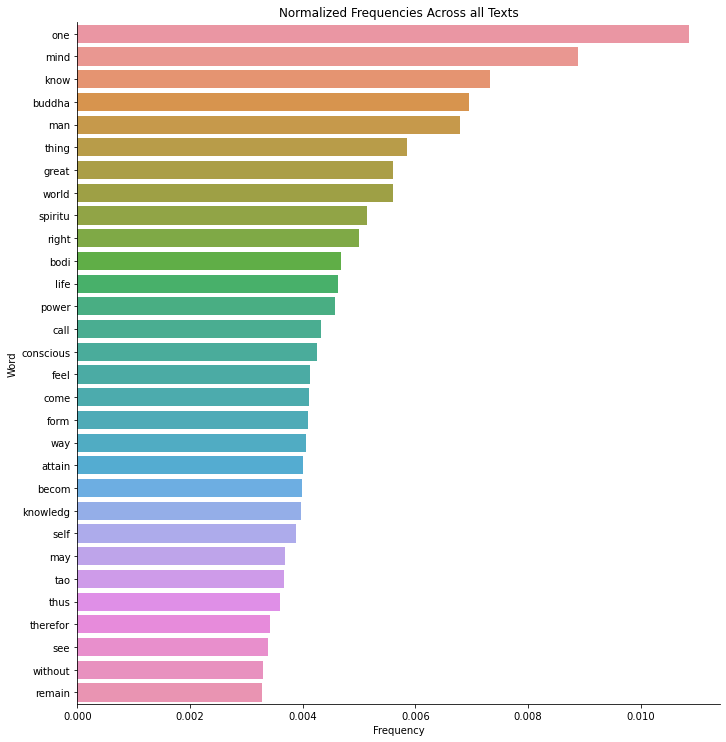

In [92]:
# Normalized Frequencies Across all Texts
all_texts_freq = sns.catplot(data=common_words[:30], y="index", x="normalized_freq", kind="bar", height=10)
all_texts_freq.set(xlabel="Frequency", ylabel="Word", title="Normalized Frequencies Across all Texts")